In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import joblib

In [2]:
# Load dataset (semicolon separated)
df = pd.read_csv(r"E:\DEV\Data_science\DataScience\Assignments\Mini_Project_Classification\bank-full.csv", sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

## Data Cleaning

In [5]:
# Remove duplicates
df = df.drop_duplicates()

In [6]:
# Strip spaces in column names
df.columns = df.columns.str.strip()

In [7]:
# Check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# Cap extreme balances (reduce outlier impact)
df['balance'] = df['balance'].clip(lower=df['balance'].quantile(0.01),
                                   upper=df['balance'].quantile(0.99))

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Exploratory Data Analysis (EDA)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


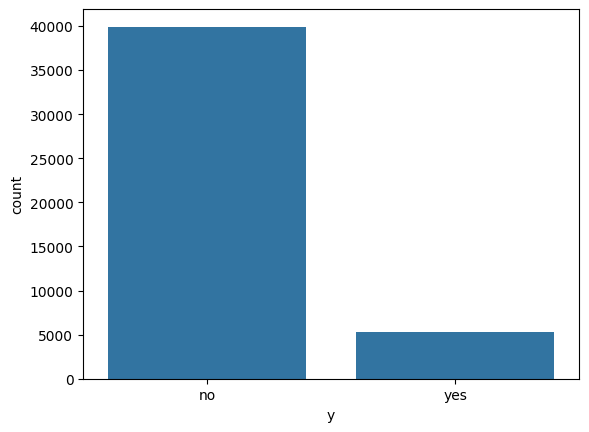

In [10]:
# Target distribution
print(df['y'].value_counts(normalize=True))
sns.countplot(x='y', data=df)
plt.show()

In [11]:
# Numeric feature summary
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1278.121689,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,2249.406970,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-627.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,13164.900000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
# map yes/no to 1/0
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,0


job
blue-collar      0.072750
entrepreneur     0.082717
housemaid        0.087903
services         0.088830
technician       0.110570
unknown          0.118056
self-employed    0.118429
admin.           0.122027
management       0.137556
unemployed       0.155027
retired          0.227915
student          0.286780
Name: y, dtype: float64


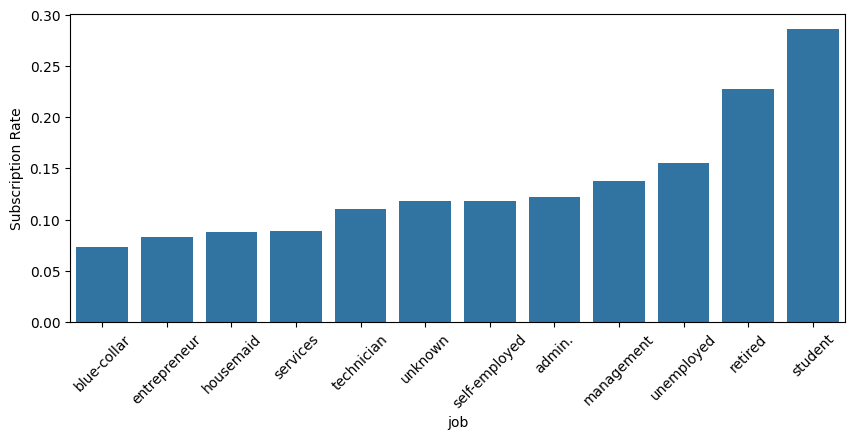

In [14]:
# Relationship: job vs subscription rate
job_success = df.groupby('job')['y'].mean().sort_values()
print(job_success)
plt.figure(figsize=(10,4))
sns.barplot(x=job_success.index, y=job_success.values)
plt.xticks(rotation=45)
plt.ylabel("Subscription Rate")
plt.show()

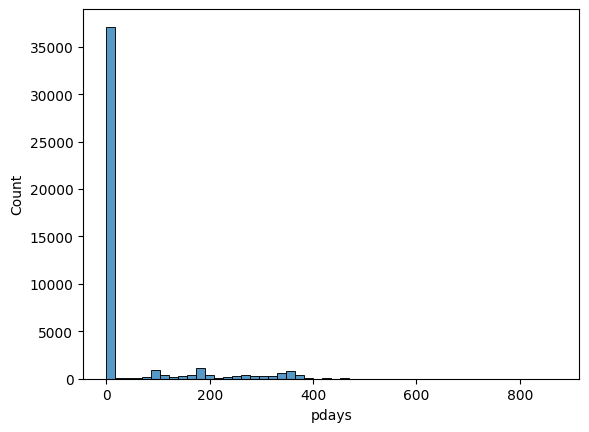

In [15]:
# Example: pdays distribution
sns.histplot(df['pdays'], bins=50)
plt.show()

## Feature 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
print(df['y'].unique())

[0 1]


In [19]:
print(df['y'].unique())
print(df['y'].value_counts())

[0 1]
y
0    39922
1     5289
Name: count, dtype: int64


In [20]:
print(df.shape)            # rows, cols
print(df.columns)          # all column names
print(df.head())  

(45211, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no   2143.0     yes   no   
1   44    technician   single  secondary      no     29.0     yes   no   
2   33  entrepreneur  married  secondary      no      2.0     yes  yes   
3   47   blue-collar  married    unknown      no   1506.0     yes   no   
4   33       unknown   single    unknown      no      1.0      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92        

In [21]:
# Target is already numeric
X = df.drop(columns=['y','duration'])
y = df['y']  # keep 0/1 as is

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [23]:
# Column types
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(exclude='object').columns.tolist()

# Pipelines
num_pipe = Pipeline([('scaler', StandardScaler())])
cat_pipe = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

### Model Training with Grid Search + Cross Validation

In [43]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline  

In [46]:
# Define Stratified K-Fold (balanced folds for classification)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # reduced folds from 5 → 3

# Candidate models and hyperparameter grids
models_and_grids = [
    (
        'logreg',
        Pipeline([
            ('prep', preprocessor),
            ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
        ]),
        {
            'clf__C': [0.1, 1, 10],             # reduced grid
            'clf__solver': ['liblinear']        # lbfgs + balanced can be slow → keep liblinear
        }
    ),
    (
        'rf',
        Pipeline([
            ('prep', preprocessor),
            ('clf', RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1))
        ]),
        {
            'clf__n_estimators': [50, 100],     # fewer trees (faster)
            'clf__max_depth': [10, None],       # shallower + unlimited
            'clf__min_samples_split': [2],      # keep default
            'clf__min_samples_leaf': [1, 2]     # small leaf size range
        }
    )
]

best_score = -1
best_model = None
best_params = None
best_name = None

for name, pipe, grid in models_and_grids:
    print(f"🔎 Running GridSearch for {name} ...")
    gs = GridSearchCV(
        estimator=pipe,
        param_grid=grid,
        scoring='f1',
        cv=cv,
        n_jobs=1,  # now parallelize to all cores
        verbose=1
    )
    gs.fit(X_train, y_train)

    print(f"{name} best F1 (CV): {gs.best_score_:.4f}")
    print(f"Best params: {gs.best_params_}\n")

    if gs.best_score_ > best_score:
        best_score = gs.best_score_
        best_model = gs.best_estimator_
        best_params = gs.best_params_
        best_name = name

print("✅ Best model overall:", best_name)
print("CV F1 Score:", best_score)
print("Params:", best_params)


🔎 Running GridSearch for logreg ...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
logreg best F1 (CV): 0.3690
Best params: {'clf__C': 1, 'clf__solver': 'liblinear'}

🔎 Running GridSearch for rf ...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
rf best F1 (CV): 0.4337
Best params: {'clf__max_depth': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}

✅ Best model overall: rf
CV F1 Score: 0.4337207339917859
Params: {'clf__max_depth': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}


In [47]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [48]:
# Predict
y_pred = best_model.predict(X_test)

# Probabilities
y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

# Reports
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

if y_proba is not None:
    print(f"📈 ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")


📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9203    0.9487    0.9343      7952
           1     0.5177    0.4015    0.4522      1091

    accuracy                         0.8827      9043
   macro avg     0.7190    0.6751    0.6933      9043
weighted avg     0.8718    0.8827    0.8761      9043

📊 Confusion Matrix:
[[7544  408]
 [ 653  438]]
📈 ROC AUC: 0.7955


### Save the Best model

In [49]:
import joblib

In [50]:
# Save trained model (pipeline includes preprocessing)
joblib.dump(best_model, "bank_best_model.joblib")
print("✅ Model saved as bank_best_model.joblib")


✅ Model saved as bank_best_model.joblib


### Load Model and test on new data

In [51]:
# Load model back
model = joblib.load("bank_best_model.joblib")

# Example new customer
sample = pd.DataFrame([{
    "age": 40, "job": "management", "marital": "married", "education": "tertiary",
    "default": "no", "balance": 1200, "housing": "yes", "loan": "no",
    "contact": "cellular", "day": 12, "month": "may", "campaign": 2,
    "pdays": 999, "previous": 0, "poutcome": "unknown"
}])

pred = model.predict(sample)[0]
proba = model.predict_proba(sample)[:,1][0]

print("Prediction:", "YES" if pred==1 else "NO")
print("Probability of YES:", round(proba,3))

Prediction: NO
Probability of YES: 0.384


In [53]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,0
